In [2]:
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import pandas as pd
import random
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import layers
from keras import models
from tensorflow.keras.losses import  categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

Using TensorFlow backend.


## 1. Ustawienia

In [3]:
pop=os.getcwd()+"\\Pliki_dzwiekowe\\waveform\\"

## 2. Dane

In [5]:
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
tulpa_wymiarow=(img_array.shape[0],img_array.shape[1])

float32
(231, 349, 1)


In [6]:
data= pd.read_csv("./pliki_dzwiekowe/spis_wavow.txt", sep = ";", header=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Obraz   7140 non-null   object
 1   Postac  7140 non-null   object
dtypes: object(2)
memory usage: 111.7+ KB


## 3. Postacie do klasyfikacji

In [8]:
postacie="""Aatrox,
    Ahri,
    Akali,
    Alistar,
    Amumu,
    Anivia,
    Annie,
    Aphelios,
    Ashe,
    Aurelion_Sol,
    Azir,
    Bard,
    Bariera,
    Barrier,
    Blitzcrank,
    Brand,
    Braum,
    Błysk,
    Caitlyn,
    Camille,
    Cassiopeia,
    ChoGath,
    Clarity,
    Cleanse,
    Corki,
    Czystość,
    Darius,
    Diana,
    Draven,
    Dr_Mundo,
    Duch,
    Ekko,
    Elise,
    Evelynn,
    Exhaust,
    Ezreal,
    Fiddlesticks,
    Fiora,
    Fizz,
    Flash,
    Galio,
    Gangplank,
    Garen,
    Ghost,
    Gnar,
    Gragas,
    Graves,
    Heal,
    Hecarim,
    Heimerdinger,
    Ignite,
    Illaoi,
    Irelia,
    Ivern,
    Janna,
    Jarvan,
    Jax,
    Jayce,
    Jhin,
    Jinx,
    Kai_Sa,
    Kalista,
    Karma,
    Karthus,
    Kassadin,
    Katarina,
    Kayle,
    Kayn,
    Kennen,
    Kha_Zix,
    Kindred,
    Kled,
    Kog_Maw,
    LeBlanc,
    Lee_Sin,
    Leona,
    Lillia,
    Lissandra,
    Lucian,
    Lulu,
    Lux,
    Malphite,
    Malzahar,
    Maokai,
    Master_Yi,
    Miss_Fortune,
    Mordekaiser,
    Morgana,
    Nami,
    Nasus,
    Nautilus,
    Neeko,
    Nidalee,
    Nocturne,
    Nunu,
    Oczyszczenie,
    Olaf,
    Orianna,
    Ornn,
    Pantheon,
    Podpalenie,
    Poppy,
    Porażenie,
    Pyke,
    Qiyana,
    Quinn,
    Rakan,
    Rammus,
    Rek_Sai,
    Renekton,
    Rengar,
    Riven,
    Rumble,
    Ryze,
    Samira,
    Sejuani,
    Senna,
    Sett,
    Shaco,
    Shen,
    Shyvana,
    Singed,
    Sion,
    Sivir,
    Skarner,
    Smite,
    Sona,
    Soraka,
    Swain,
    Sylas,
    Syndra,
    Tahm_Kench,
    Taliyah,
    Talon,
    Taric,
    Teemo,
    Teleport,
    Thresh,
    Tristana,
    Trundle,
    Tryndamere,
    Twisted_Fate,
    Twitch,
    Udyr,
    Urgot,
    Uzdrowienie,
    Varus,
    Vayne,
    Veigar,
    Vel_Koz,
    Vi,
    Viktor,
    Vladimir,
    Volibear,
    Warwick,
    Wukong,
    Wyczerpanie,
    Xayah,
    Xerath,
    Xin_Zhao,
    Yasuo,
    Yorick,
    Yone,
    Yuumi,
    Zac,
    Zed,
    Ziggs,
    Zilean,
    Zoe,
    Zyra"""

l_postaci=postacie.split(",")
lista_postaci=[]
lista_postaci.append('Aatrox')
for x in range(1,len(l_postaci)):
    qwe=l_postaci[x].split("    ")
    lista_postaci.append(qwe[1])

In [9]:
num_classes=len(lista_postaci)

## 4. Preprocesing danych

Dane sa w postaci plików.png

Po wczytaniu są przkeształcane do dwuwymiarowej macierzy wartości pixelów.

Kolejno zmieniane są na skalę odcieni szarości.

Końcowo sa normalizowane przez odjęcie wartości 0.5.

In [10]:
train_x_l=[]
test_x_l=[]
walid_x_l=[]

train_y_l=[]
test_y_l=[]
walid_y_l=[]

for x in range(170):
    pozycje=[]
    for qwe in range(0,42):
        pozycje.append(qwe)
    for z in range(4):
        a=random.choice(pozycje)
        pozycje.remove(a)
        zmienna=(42*x)+a
        walid_x_l.append((img_to_array(load_img(pop+data.iloc[zmienna][0],color_mode="grayscale"))/255)-0.5)
        walid_y_l.append(data.iloc[zmienna][1])
        
        a=random.choice(pozycje)
        pozycje.remove(a)
        zmienna=(42*x)+a
        test_x_l.append((img_to_array(load_img(pop+data.iloc[zmienna][0],color_mode="grayscale"))/255)-0.5)
        test_y_l.append(data.iloc[zmienna][1])

        
    for y in pozycje:
        zmienna=(42*x)+y
        train_x_l.append((img_to_array(load_img(pop+data.iloc[zmienna][0],color_mode="grayscale"))/255)-0.5)
        train_y_l.append(data.iloc[zmienna][1])

In [11]:
print(len(train_x_l),len(test_x_l),len(walid_x_l),len(train_x_l)+len(test_x_l)+len(walid_x_l))

5780 680 680 7140


Zbiór treningowy : 5780

Zbiory walidacyjne i testowe : 680

In [12]:
train_x_l[0].shape

(231, 349, 1)

In [14]:
slownik={}
for x in range(len(lista_postaci)):
    slownik[lista_postaci[x]]=x

In [15]:
train_x_l[0][0][0]

array([0.5], dtype=float32)

## 4.1 Tworzę zbiory z opisami do klasyfikacji

In [16]:
walid_y=[]
for x in range(len(walid_y_l)):
    walid_y.append(slownik[walid_y_l[x]])
walid_y=to_categorical(walid_y)
    
test_y=[]
for x in range(len(test_y_l)):
    test_y.append(slownik[test_y_l[x]])
test_y=to_categorical(test_y)
    
train_y=[]
for x in range(len(train_y_l)):
    train_y.append(slownik[train_y_l[x]])
train_y=to_categorical(train_y)

## 5. Sieć neruonowa

In [17]:
test_x_l[0].shape

(231, 349, 1)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32,# w połowie połączone #1
                 kernel_size=(3, 3), # okno przesuwajace sie
                 strides=(3, 3), # paski # o ile sie przesuwa?
                 activation='relu', 
                 input_shape=(tulpa_wymiarow[0], tulpa_wymiarow[1], 1)))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(3, 3)))
          
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #2 
          
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu')) #2 
          
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
          
model.add(layers.Flatten())
          
model.add(layers.Dense(200, activation='relu'))
          
model.add(layers.Dense(num_classes, activation='softmax'))
          
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.01),
              metrics=['accuracy'])


In [20]:
train_x=train_x_l
walid_x=walid_x_l
test_x=test_x_l
train_x=numpy.array(train_x)
test_x=numpy.array(test_x)
walid_x=numpy.array(walid_x)


In [30]:
# Fit data to model
batch_size=64
callbacks=[
EarlyStopping( monitor='val_loss', min_delta=0.01, patience=20, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
]
history_1=model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=500,
          verbose=2,
          validation_data=(walid_x,walid_y),
                   callbacks=callbacks)

Train on 5780 samples, validate on 680 samples
Epoch 1/500
 - 10s - loss: 1.1142 - accuracy: 0.6661 - val_loss: 2.0094 - val_accuracy: 0.4279
Epoch 2/500
 - 11s - loss: 0.9866 - accuracy: 0.7019 - val_loss: 3.1714 - val_accuracy: 0.3132
Epoch 3/500
 - 11s - loss: 0.9020 - accuracy: 0.7291 - val_loss: 1.9158 - val_accuracy: 0.4632
Epoch 4/500
 - 11s - loss: 0.7537 - accuracy: 0.7708 - val_loss: 1.5646 - val_accuracy: 0.5515
Epoch 5/500
 - 10s - loss: 0.6575 - accuracy: 0.7988 - val_loss: 1.4373 - val_accuracy: 0.5853
Epoch 6/500
 - 10s - loss: 0.6109 - accuracy: 0.8140 - val_loss: 2.2250 - val_accuracy: 0.5000
Epoch 7/500
 - 11s - loss: 0.5525 - accuracy: 0.8324 - val_loss: 1.4092 - val_accuracy: 0.5971
Epoch 8/500
 - 11s - loss: 0.4342 - accuracy: 0.8702 - val_loss: 1.7272 - val_accuracy: 0.5559
Epoch 9/500
 - 11s - loss: 0.4116 - accuracy: 0.8779 - val_loss: 1.1496 - val_accuracy: 0.6618
Epoch 10/500
 - 10s - loss: 0.3340 - accuracy: 0.9057 - val_loss: 0.8713 - val_accuracy: 0.7206
Ep

## 6. Wyniki 

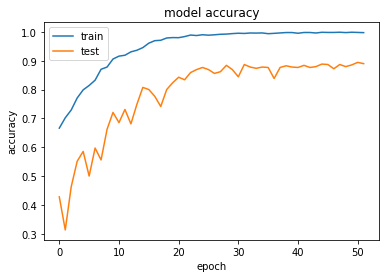

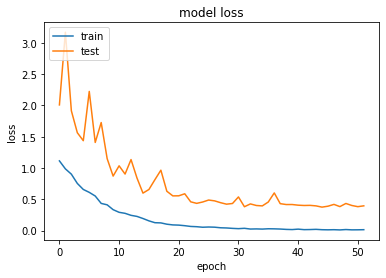

In [37]:
wykresy(history_1)

In [36]:
def wykresy(historia_modelu):
        plt.plot(historia_modelu.history['accuracy'])
        plt.plot(historia_modelu.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(historia_modelu.history['loss'])
        plt.plot(historia_modelu.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [50]:
results=model.evaluate(test_x,test_y,batch_size)
print("test loss:",results[0], "test acc:", results[1])

680/680 [==============================] - 0s 580us/step
test loss: 0.34645119291894577 test acc: 0.8999999761581421


Model dla danych testowych, wykazuję precyzję rzedu 90%

In [51]:
Y_pred=model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)

In [82]:
list1 = Y_pred.tolist()
list2=[]
for x in range(len(list1)):
    a=max(list1[x])
    spr=False
    list2.append(list())
    for z in range(len(list1[x])):
        if spr==False:
            if list1[x][z]==a:
                list2[x].append(1.0)
                spr=True
            else:
                list2[x].append(0.0)
        else:
            list2[x].append(0.0)


In [84]:
y_pred=numpy.array(list2)        

## 6.2 Macierz pomyłek

In [ ]:
matrix = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))

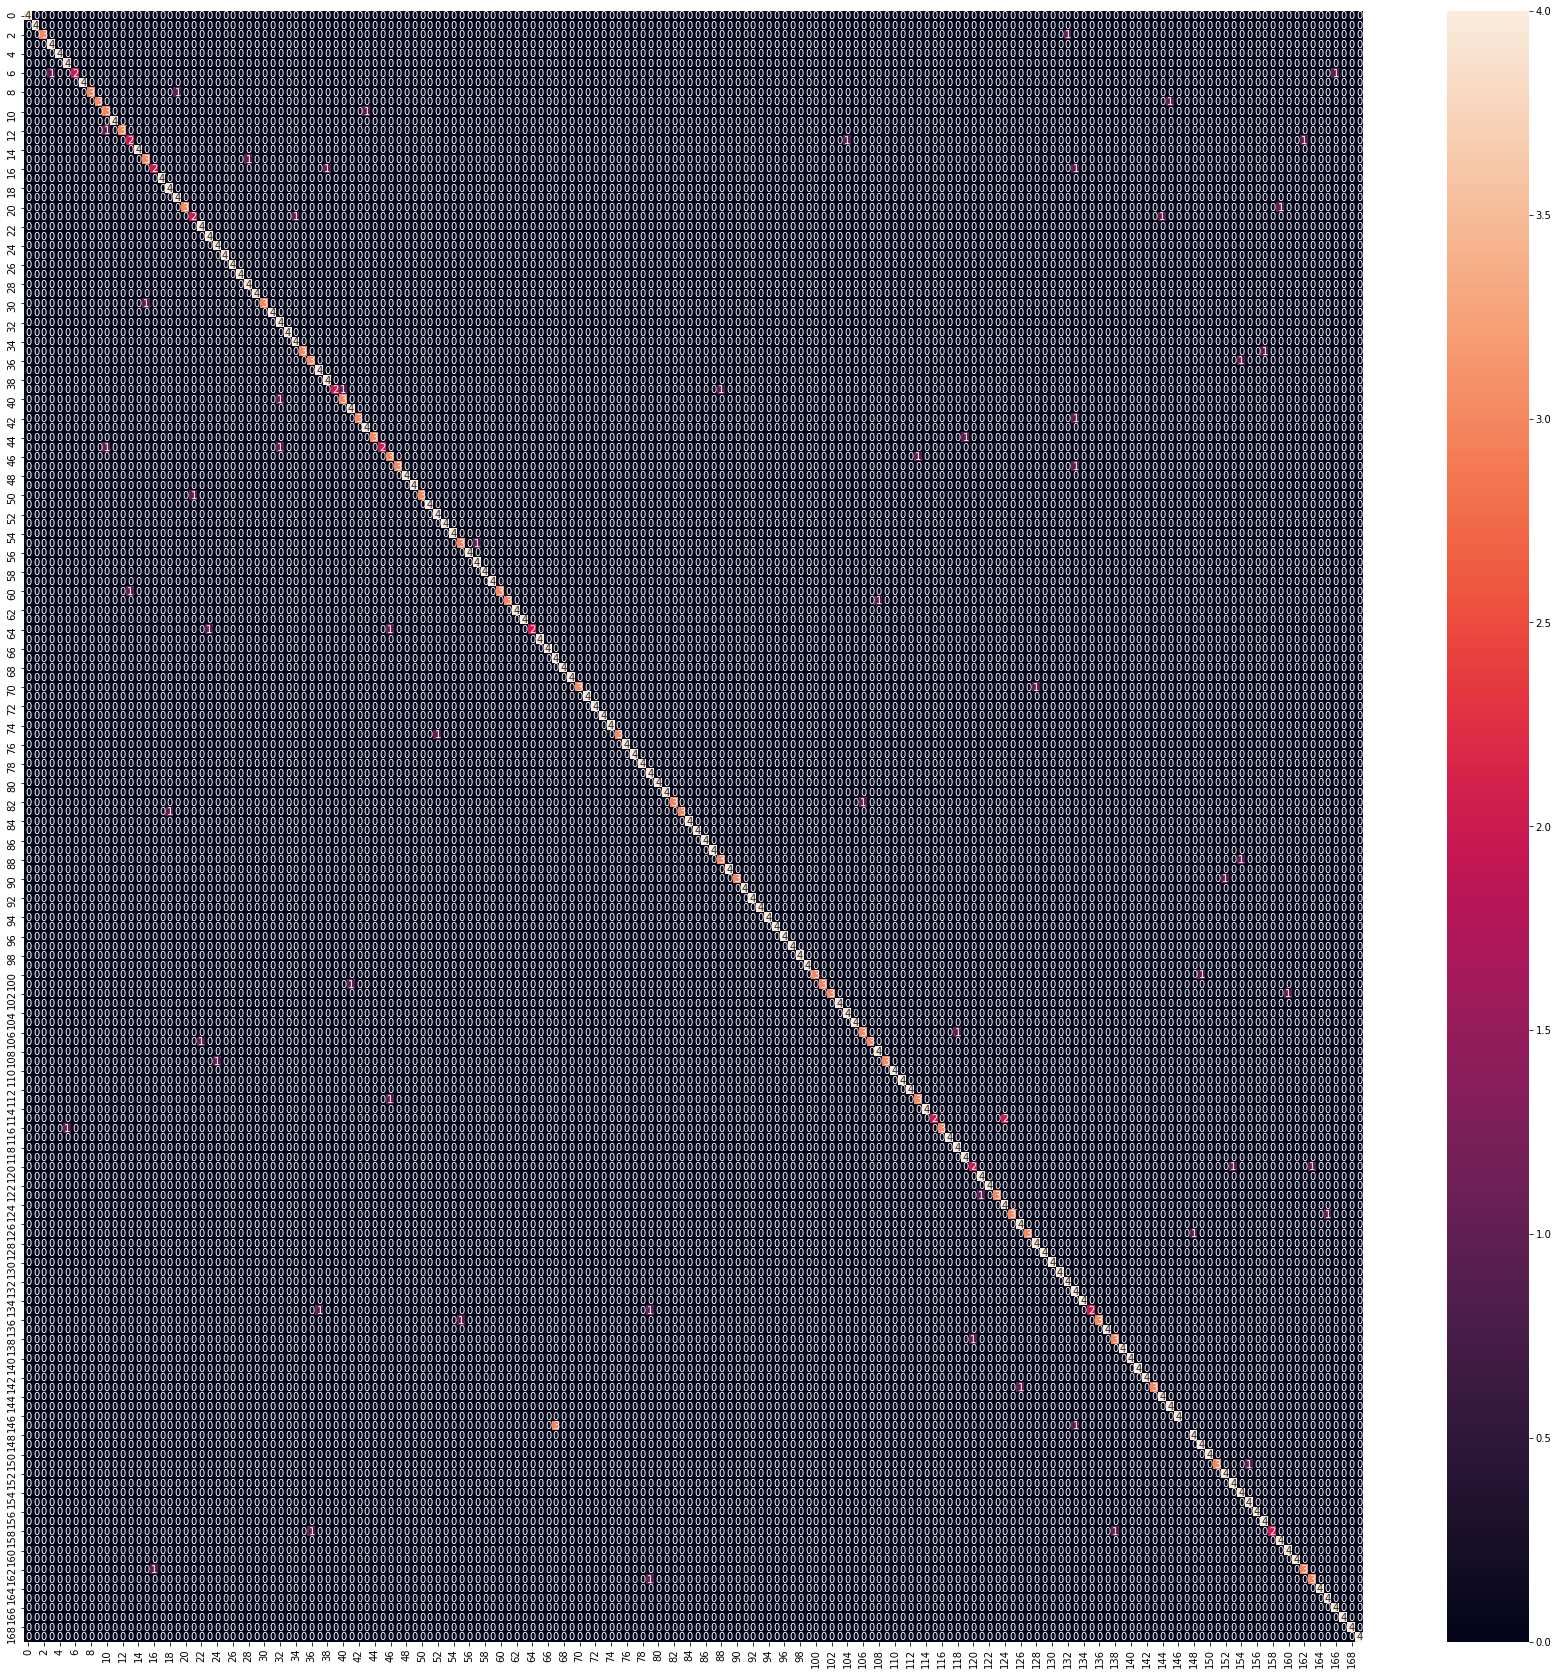

In [96]:
plt.figure(figsize = (30,30))

sn.heatmap(matrix, annot=True)

In [ ]:
csvwrite('file.csv',matrix)